In [1]:
# Import Modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('dark_background')

%load_ext autoreload
%autoreload 2

pd.set_option('display.min_row', 25)
pd.set_option('display.max_column', 100)
pd.set_option('display.max_colwidth', 300)

### Possible additional datasets:

- Current Land Use Zoning Detail: https://data.seattle.gov/Land-Base/Current-Land-Use-Zoning-Detail/9nvb-wk9b
- *Bike Rack Locations* (Contains lat&long): https://data.seattle.gov/Land-Base/Bike-Racks/pbej-cxb2
- *Marked Crosswalks* (Contains various, including at signal or stop sign): https://data.seattle.gov/Land-Base/Marked-Crosswalks/dx75-5pzj
- Seattle Light Poles Location (Contains lat&long): https://data.seattle.gov/Land-Base/Seattle-City-Light-Poles/f4y8-37gx
- Traffic Signals (DOES NOT HAVE LAT&LONG) Contains if there is a bike signal or not): https://data.seattle.gov/Land-Base/Traffic-Signals/s63a-bkj8
- *Traffic Circles* (Contains lat&long): https://data.seattle.gov/Land-Base/Traffic-Circles/hw9f-j7b8
- *Radar Speed Signs* (Contains lat&long): https://data.seattle.gov/Land-Base/Radar-Speed-Signs/siht-4gsh

##### Unrelated: 
- Areaways: https://data.seattle.gov/Land-Base/Areaways/nmja-kgz6

## Import in all the datasets

In [2]:
streets = pd.read_csv('../data/Seattle_Streets.csv')

In [3]:
# Load data and set Datetime column
collisions = pd.read_csv('../data/Collisions.csv', 
                         parse_dates={'Datetime': ['INCDTTM']}, 
                         infer_datetime_format=True)

In [4]:
# set datetime as index
collisions = collisions.set_index('Datetime').sort_index()

In [5]:
collisions.head()

,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,INCDATE,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
Datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2003-10-06,-122.320755,47.608073,909,3663,3663,1787335,Matched,Intersection,29797.0,BROADWAY AND CHERRY ST,NaN,NaN,0,Unknown,NaN,0,0,0,0,0,0,0,2003/10/06 00:00:00+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,3279003.0,NaN,NaN,NaN,0,0,N
2004-01-01,-122.316863,47.615847,18457,32216,32216,1775182,Matched,Block,NaN,12TH AVE BETWEEN E PINE ST AND E OLIVE ST,NaN,NaN,1,Property Damage Only Collision,Other,5,0,0,2,0,0,0,2004/01/01 00:00:00+00,Mid-Block (but intersection related),16.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE SIDESWIPE",NaN,0,Raining,Dry,Dark - Street Lights On,NaN,4001022.0,NaN,23,From same direction - all others,0,0,N
2004-01-01,NaN,NaN,18014,31860,31860,1789485,Matched,Block,NaN,AURORA AVE N BETWEEN BATTERY ST TUNNEL NB AND THOMAS ST,NaN,NaN,2,Injury Collision,Rear Ended,4,0,0,3,1,0,0,2004/01/01 00:00:00+00,Mid-Block (not related to intersection),14.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,0,Overcast,Wet,Dark - Street Lights On,NaN,4001017.0,Y,13,From same direction - both going straight - both moving - rear-end,0,0,N
2004-01-01,-122.314210,47.664908,10643,24534,24534,1780964,Matched,Intersection,25792.0,BROOKLYN AVE NE AND NE 50TH ST,NaN,NaN,2,Injury Collision,Left Turn,7,0,0,2,2,0,0,2004/01/01 00:00:00+00,At Intersection (intersection related),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END AT ANGLE",NaN,0,Raining,Wet,Daylight,NaN,4001023.0,NaN,28,From opposite direction - one left turn - one straight,0,0,N
2004-01-01,-122.293643,47.721985,3443,16991,16991,1780749,Matched,Block,NaN,LAKE CITY WAY NE BETWEEN NE 127TH ST AND NE 130TH ST,NaN,NaN,2,Injury Collision,Rear Ended,2,0,0,2,1,0,0,2004/01/01 00:00:00+00,Mid-Block (but intersection related),14.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,0,Raining,Wet,Daylight,NaN,4001005.0,NaN,14,From same direction - both going straight - one stopped - rear-end,0,0,N


In [6]:
collisions.describe()

,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
count,212878.000000,212878.000000,220338.000000,220338.000000,220338.000000,71472.000000,220338.000000,220338.000000,220338.000000,220338.000000,220338.000000,220338.000000,220338.000000,220337.000000,1.272050e+05,220338.000000,2.203380e+05
mean,-122.330752,47.620234,110169.500000,143809.710463,144031.876830,37601.430980,2.227119,0.038155,0.027294,1.730614,0.373839,0.015168,0.001675,13.382124,7.971063e+06,262.542689,9.621717e+03
std,0.030042,0.056006,63606.246144,88381.117503,88747.658541,51864.925192,1.471631,0.201883,0.164355,0.829109,0.732377,0.158098,0.044503,7.306179,2.611523e+06,3255.640460,7.162528e+04
min,-122.419091,47.495573,1.000000,1001.000000,1001.000000,23807.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.007024e+06,0.000000,0.000000e+00
25%,-122.349280,47.577331,55085.250000,71371.250000,71371.250000,28652.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,11.000000,6.007029e+06,0.000000,0.000000e+00
50%,-122.330348,47.616106,110169.500000,126657.500000,126657.500000,29973.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,11.000000,8.033011e+06,0.000000,0.000000e+00
75%,-122.312000,47.664228,165253.750000,208221.750000,208421.750000,33983.000000,3.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,14.000000,1.018101e+07,0.000000,0.000000e+00
max,-122.238949,47.734142,220338.000000,332492.000000,333992.000000,757580.000000,93.000000,6.000000,2.000000,15.000000,78.000000,41.000000,5.000000,87.000000,1.307202e+07,525241.000000,5.239700e+06


#### Bike Racks

In [7]:
bikeracks = pd.read_csv('../data/Bike_Racks.csv')

In [8]:
bikeracks.describe()

,X,Y,OBJECTID,COMPKEY,COMPTYPE,SEGKEY,DISTANCE,WIDTH,RACK_CAPACITY,OVERRIDECOMMENT,SHAPE_LNG,SHAPE_LAT
count,3.940000e+03,3940.000000,3953.000000,3953.000000,3953.0,3953.000000,3953.000000,3946.000000,3953.000000,0.0,3953.000000,3953.000000
mean,1.269985e+06,231892.313295,1977.000000,566358.186441,16.0,17366.003036,237.913503,-0.579321,2.893752,NaN,-122.352250,47.623118
std,7.146816e+03,15411.690509,1141.277135,73356.327275,0.0,50982.801620,514.411184,27.659317,2.548883,NaN,0.290897,0.063000
min,1.249223e+06,185196.853746,1.000000,507180.000000,16.0,1001.000000,-271.000000,-61.000000,0.000000,NaN,-127.390658,46.808300
25%,1.266078e+06,224258.963786,989.000000,517722.000000,16.0,7246.000000,80.000000,-27.000000,2.000000,NaN,-122.352364,47.604526
50%,1.270261e+06,229254.574623,1977.000000,518843.000000,16.0,11453.000000,170.000000,-17.000000,2.000000,NaN,-122.334058,47.618663
75%,1.274628e+06,244876.205375,2965.000000,614504.000000,16.0,14630.000000,276.000000,27.000000,2.000000,NaN,-122.317260,47.661462
max,1.290757e+06,270742.749257,3953.000000,764154.000000,16.0,701839.000000,8226.602746,64.000000,42.000000,NaN,-122.248262,47.732177


In [62]:
# remove duplicates
bikeracks = bikeracks[~bikeracks['latlon_tup'].duplicated()]

#### Radar

In [9]:
radar = pd.read_csv('../data/Radar_Speed_Signs.csv')

In [10]:
radar.describe()

,X,Y,OBJECTID,COMPKEY,COMPTYPE,SEGKEY,SHAPE_LNG,SHAPE_LAT
count,5.000000e+01,50.000000,51.000000,51.000000,51.0,51.000000,51.000000,51.000000
mean,1.271913e+06,228271.004128,26.000000,579386.392157,16.0,24578.411765,-122.426795,47.600142
std,1.134439e+04,26917.863378,14.866069,66930.531944,0.0,65571.590722,0.710428,0.134673
min,1.254781e+06,188309.121845,1.000000,508865.000000,16.0,2062.000000,-127.390658,46.808300
25%,1.262483e+06,205533.226615,13.500000,510615.000000,16.0,8417.000000,-122.370666,47.547403
50%,1.268165e+06,233298.280451,26.000000,573710.000000,16.0,12375.000000,-122.343369,47.628958
75%,1.282238e+06,256377.124251,38.500000,618231.000000,16.0,13767.500000,-122.286600,47.692255
max,1.291550e+06,269860.754120,51.000000,763391.000000,16.0,351697.000000,-122.245047,47.729585


In [60]:
# no duplicates
radar[radar['latlon_tup'].duplicated()]

,X,Y,OBJECTID,COMPKEY,UNITID,UNITDESC,OWNERSHIP,CONDITION,CURRENT_STATUS,OVERRIDEYN,COMPTYPE,SEGKEY,UNITTYPE,BLUE_TOOTH_ENABLED,DATA_COLLECTION_CAPABILITY,SERVICE_POINT,SOLAR_OPERATED,SIDE,SHAPE_LNG,SHAPE_LAT,latlon_tup


#### Traffic Circles

In [41]:
traf_circles = pd.read_csv('../data/Traffic_Circles.csv')

In [42]:
traf_circles.describe()

,X,Y,OBJECTID,COMPKEY,COMPTYPE,INTKEY,MAINTENANCE_AGREEMENT,OVERRIDECOMMENT,TRCSIZE,SHAPE_LNG,SHAPE_LAT
count,1.066000e+03,1066.000000,1066.000000,1066.000000,1066.0,1066.000000,0.0,0.0,1066.000000,1066.000000,1066.000000
mean,1.271092e+06,237962.365233,536.364916,514379.655722,16.0,31409.176360,NaN,NaN,1.023452,-122.331624,47.642502
std,8.319619e+03,21296.612515,310.080612,25212.760291,0.0,17870.228413,NaN,NaN,4.252413,0.033985,0.058320
min,1.251066e+06,189896.971383,1.000000,503775.000000,16.0,23843.000000,NaN,NaN,0.000000,-122.410795,47.510065
25%,1.264646e+06,223597.242793,268.250000,509148.250000,16.0,26137.000000,NaN,NaN,0.000000,-122.358178,47.603508
50%,1.271680e+06,244477.566446,535.500000,509414.500000,16.0,30162.500000,NaN,NaN,0.000000,-122.330219,47.660312
75%,1.278179e+06,255024.569449,804.750000,509681.750000,16.0,35051.500000,NaN,NaN,0.000000,-122.303642,47.688720
max,1.288603e+06,271172.043082,1072.000000,728814.000000,16.0,503820.000000,NaN,NaN,35.000000,-122.257034,47.733213


In [52]:
# remove duplicates
traf_circles = traf_circles[~traf_circles['latlon_tup'].duplicated()]

#### Marked Crosswalks

In [13]:
marked_cross = pd.read_csv('../data/Marked_Crosswalks.csv')

In [14]:
marked_cross.describe()

,X,Y,OBJECTID,COMPKEY,COMPTYPE,SEGKEY,CURBSPACEID,OVERRIDECOMMENT,SHAPE_LNG,SHAPE_LAT,DISTTOLOW,STPOINT,DISTTOHI,OFFSET,ATTACHMENT_3,ATTACHMENT_4,ATTACHMENT_5,ATTACHMENT_6,ATTACHMENT_7,ATTACHMENT_8,ATTACHMENT_9,NUM_ATTACHMENTS
count,5.670000e+03,5670.000000,5683.000000,5683.000000,5683.0,5683.000000,0.0,0.0,5683.000000,5683.000000,5683.000000,5683.000000,5683.000000,5683.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5683.000000
mean,1.271278e+06,229922.291977,2852.497097,539892.746085,16.0,28475.626958,NaN,NaN,-122.341805,47.618618,218.317086,0.053317,222.554109,0.029914,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003871
std,7.445840e+03,18723.142549,1645.202929,43644.710340,0.0,82698.380557,NaN,NaN,0.243662,0.064274,265.012751,1.294320,278.306463,0.719922,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.067534
min,1.249875e+06,185194.454212,1.000000,511360.000000,16.0,1000.000000,NaN,NaN,-127.390658,46.808300,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,1.267081e+06,219164.447459,1428.500000,522207.500000,16.0,8239.000000,NaN,NaN,-122.347575,47.590312,32.000000,0.000000,30.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,1.271209e+06,228429.387263,2852.000000,523685.000000,16.0,12218.000000,NaN,NaN,-122.329739,47.616191,103.000000,0.000000,114.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
75%,1.275824e+06,244690.482037,4276.500000,525137.500000,16.0,17052.500000,NaN,NaN,-122.312560,47.661249,300.000000,0.000000,302.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
max,1.292399e+06,271493.574592,5701.000000,765387.000000,16.0,724668.000000,NaN,NaN,-122.241298,47.734136,3351.000000,74.000000,4177.000000,30.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000


In [58]:
# remove duplicates
marked_cross = marked_cross[~marked_cross['latlon_tup'].duplicated()]

## Calculate Distance between 2 coordinates

In [15]:
import geopy.distance

Testing out a pair of coordinates

In [16]:
import timeit

In [17]:
coords_1 = (marked_cross['SHAPE_LAT'][0], marked_cross['SHAPE_LNG'][0])
coords_2 = (collisions['Y'][0], collisions['X'][0])

%timeit geopy.distance.distance(coords_1, coords_2).miles

298 µs ± 16 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [18]:
% timeit abs(coords_1[0] - coords_2[0])

471 ns ± 94 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [19]:
from math import acos, cos, radians, sin

In [20]:
%timeit 3959 * acos(cos(radians(coords_1[0])) * cos(radians(coords_2[0])) * cos(radians(coords_2[1]) - radians(coords_1[1])) + sin(radians(coords_1[0])) * sin(radians(coords_2[0])))

1.82 µs ± 346 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


### Finding Nearest Point (in miles)

In [21]:
# import in library to help display progress bar of iterables

from tqdm import tqdm
getattr(tqdm, '_instances', {}).clear()

In [22]:
# make new dataset and get rid of nan values in collisions
new_collisions = collisions.copy()

In [23]:
# temporarily fill with 0 in order to avoid errors when calculating distance that has no latitude/longitude
new_collisions['Y'].fillna(value=0, inplace=True)
new_collisions['X'].fillna(value=0, inplace=True)

For each dataset, create a new column with the latitude and longitude value as a tuple since it is the input type for the geopy.distance.distance

In [43]:
new_collisions['latlon_tup'] = list(zip(new_collisions['Y'], new_collisions['X']))
marked_cross['latlon_tup'] = list(zip(marked_cross['SHAPE_LAT'], marked_cross['SHAPE_LNG']))
radar['latlon_tup'] = list(zip(radar['SHAPE_LAT'], radar['SHAPE_LNG']))
bikeracks['latlon_tup'] = list(zip(bikeracks['SHAPE_LAT'], bikeracks['SHAPE_LNG']))
traf_circles['latlon_tup'] = list(zip(traf_circles['SHAPE_LAT'], traf_circles['SHAPE_LNG']))

Define a function that will calculate the distance of collisions to each of the locations of the features and find the closest one to the collision.

NOTE: As you can see in the later cell, it takes about an hr to run through everything and find the nearest radar sign to each collision. For now, it will do because the calculated data will be added onto a new copy of the collisions dataset and saved as a csv.

WORK ON: finding more optimal function because the other additional dataset has significantly more rows than the radar. It will not be a fun time running it all.

In [ ]:
# # Way too slow- takes hours

# def calc_latlon(collisions_latlon, feature_latlon):
#     '''
#     Input:
#     collisions_latlon: Pd.Series of latlon tuples
#     feature_latlon: Pd.Series of latlon tuples
    
#     Returns:
#     new column of nearest distance for feature
#     '''
#     dist_vals = []
#     for i in tqdm(collisions_latlon):
#         if i == (0,0):
#             dist_vals.append(0)
#         else:
#             smallest = 100
#             for x in feature_latlon:
#                 temp = geopy.distance.distance(i, x).miles
#                 if temp < smallest:
#                     smallest = temp
#             dist_vals.append(smallest)
#     return dist_vals

In [ ]:
## Faster but not accurate

# def calc_latlon_v2(collisions_latlon, feature_latlon):
#     '''
#     Input:
#     collisions_latlon: Pd.Series of latlon tuples
#     feature_latlon: Pd.Series of latlon tuples
    
#     Returns:
#     new column of nearest distance for feature
#     '''
#     dist_vals = []
#     for i in tqdm(collisions_latlon):
#         if i == (0,0):
#             dist_vals.append(0)
#         else:
#             lat_diff = 1
#             lng_diff = 1
#             for x in feature_latlon:
#                 if (abs(i[0] - x[0]) < lat_diff) & (abs(i[1] - x[1]) < lng_diff):
#                     coords = x
#             temp = geopy.distance.distance(i, coords).miles
#             dist_vals.append(temp)
#     return dist_vals

In [70]:
def calc_latlon_v3(collisions_latlon, feature_latlon):
    '''
    Input:
    collisions_latlon: Pd.Series of latlon tuples
    feature_latlon: Pd.Series of latlon tuples
    
    Returns:
    new column of nearest distance for feature
    '''
    dist_vals = []
    for i in tqdm(collisions_latlon):
        if i == (0,0):
            dist_vals.append(0)
        else:
            smallest = 100
            for x in feature_latlon:
                try:
                    temp = 3959 * acos(cos(radians(i[0])) * cos(radians(x[0])) * cos(radians(x[1]) - radians(i[1])) + sin(radians(i[0])) * sin(radians(x[0])))
                except:
                    continue
                if temp < smallest:
                    smallest = temp
            dist_vals.append(smallest)
    return dist_vals

In [72]:
bikerack_dist = calc_latlon_v3(new_collisions['latlon_tup'], bikeracks['latlon_tup'])

100%|██████████| 220338/220338 [42:14<00:00, 86.92it/s]


In [65]:
radar_dist = calc_latlon_v3(new_collisions['latlon_tup'], radar['latlon_tup'])

100%|██████████| 220338/220338 [00:30<00:00, 7144.75it/s]


In [71]:
t_circles_dist = calc_latlon_v3(new_collisions['latlon_tup'], traf_circles['latlon_tup'])

100%|██████████| 220338/220338 [12:53<00:00, 285.04it/s]


In [76]:
marked_cross_dist = calc_latlon_v3(new_collisions['latlon_tup'], marked_cross['latlon_tup'])

100%|██████████| 220338/220338 [49:57<00:00, 73.52it/s]


In [77]:
new_collisions['bikerack_dist'] = bikerack_dist
new_collisions['radar_dist'] = radar_dist
new_collisions['t_circles_dist'] = t_circles_dist
new_collisions['marked_cross_dist'] = marked_cross_dist

In [78]:
new_collisions.head()

,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,INCDATE,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR,latlon_tup,bikerack_dist,radar_dist,t_circles_dist,marked_cross_dist
Datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2003-10-06,-122.320755,47.608073,909,3663,3663,1787335,Matched,Intersection,29797.0,BROADWAY AND CHERRY ST,NaN,NaN,0,Unknown,NaN,0,0,0,0,0,0,0,2003/10/06 00:00:00+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,3279003.0,NaN,NaN,NaN,0,0,N,"(47.608073467378794, -122.32075479129101)",0.011293,1.786588,0.248892,0.004166
2004-01-01,-122.316863,47.615847,18457,32216,32216,1775182,Matched,Block,NaN,12TH AVE BETWEEN E PINE ST AND E OLIVE ST,NaN,NaN,1,Property Damage Only Collision,Other,5,0,0,2,0,0,0,2004/01/01 00:00:00+00,Mid-Block (but intersection related),16.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE SIDESWIPE",NaN,0,Raining,Dry,Dark - Street Lights On,NaN,4001022.0,NaN,23,From same direction - all others,0,0,N,"(47.6158466942628, -122.31686348709101)",0.008300,1.251186,0.073032,0.034031
2004-01-01,0.000000,0.000000,18014,31860,31860,1789485,Matched,Block,NaN,AURORA AVE N BETWEEN BATTERY ST TUNNEL NB AND THOMAS ST,NaN,NaN,2,Injury Collision,Rear Ended,4,0,0,3,1,0,0,2004/01/01 00:00:00+00,Mid-Block (not related to intersection),14.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,0,Overcast,Wet,Dark - Street Lights On,NaN,4001017.0,Y,13,From same direction - both going straight - both moving - rear-end,0,0,N,"(0.0, 0.0)",0.000000,0.000000,0.000000,0.000000
2004-01-01,-122.314210,47.664908,10643,24534,24534,1780964,Matched,Intersection,25792.0,BROOKLYN AVE NE AND NE 50TH ST,NaN,NaN,2,Injury Collision,Left Turn,7,0,0,2,2,0,0,2004/01/01 00:00:00+00,At Intersection (intersection related),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END AT ANGLE",NaN,0,Raining,Wet,Daylight,NaN,4001023.0,NaN,28,From opposite direction - one left turn - one straight,0,0,N,"(47.6649084746288, -122.314210090723)",0.026256,1.345241,0.116098,0.005466
2004-01-01,-122.293643,47.721985,3443,16991,16991,1780749,Matched,Block,NaN,LAKE CITY WAY NE BETWEEN NE 127TH ST AND NE 130TH ST,NaN,NaN,2,Injury Collision,Rear Ended,2,0,0,2,1,0,0,2004/01/01 00:00:00+00,Mid-Block (but intersection related),14.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,0,Raining,Wet,Daylight,NaN,4001005.0,NaN,14,From same direction - both going straight - one stopped - rear-end,0,0,N,"(47.721985407450894, -122.293642667672)",0.037611,0.198203,0.244040,0.059682


In [79]:
new_collisions.to_csv('../data/feateng_collisions.csv')

In [ ]:
new_collisions.describe()

Some simple EDA to see if there are big differences of the nearest radar location and the severity of the crash. So far, does not seem like there is.

In [ ]:
person_count = new_collisions[['PEDCOUNT', 'PERSONCOUNT', 'VEHCOUNT', 'SEVERITYCODE', 'SPEEDING', 'nearest_radar']]

In [ ]:
person_count.groupby('SEVERITYCODE').mean()

Simple EDA of whether the crash involved speeding and the average distance of the nearest radar. The thought was that if there is a radar nearby, speeding would be less likely. This will need more exploration as well.

In [ ]:
speed_radar = new_collisions[['ADDRTYPE', 'SPEEDING', 'nearest_radar']]

In [ ]:
speed_radar.head()

In [ ]:
speed_radar.groupby('SPEEDING').mean()

In [ ]:
# average radar distance with no speeding recorded (NaN values for speeding)
speed_radar[speed_radar['SPEEDING'] != 'Y']['nearest_radar'].mean()

In [ ]:
speed_radar.groupby('ADDRTYPE').mean()

### Quick correlation heatmap

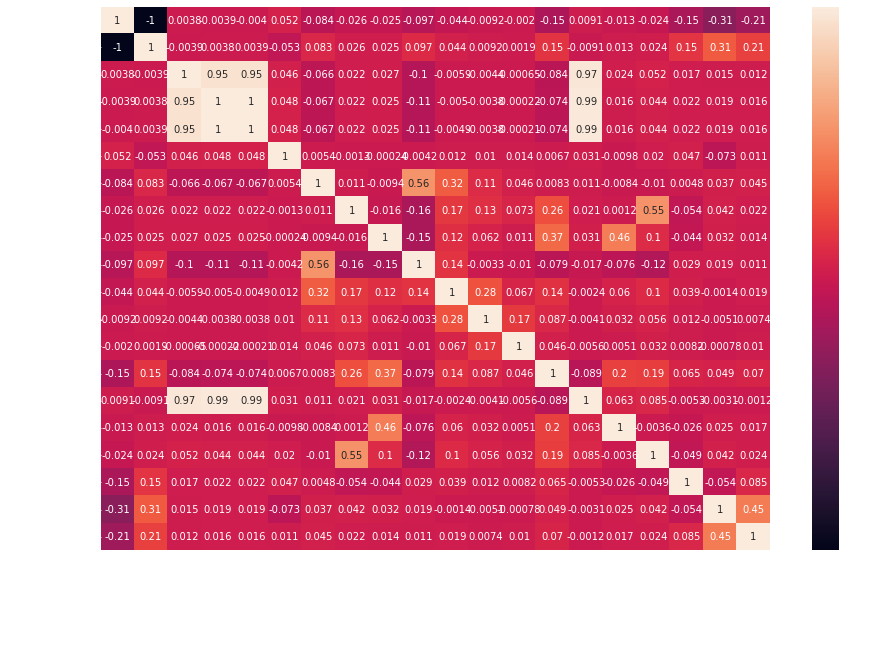

In [75]:
fig, ax = plt.subplots(figsize=(15,10))

ax = sns.heatmap(new_collisions.corr(), annot=True)